# Introduction
In this notebook, we will explore the crop production dataset to gain insights into the distribution and trends of crop production across different states and districts in India. The primary objectives are to understand data characteristics, identify patterns, and visualize key metrics.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Acquisition

In [3]:
# data_acquisition.py
def load_data(file_path):
    """Load the dataset from a CSV file."""
    return pd.read_csv(file_path)

if __name__ == "__main__":
    df = load_data('crop_production/crop_production.csv')
    print(df.head())


                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS     2000.0  Kharif        
1  Andaman and Nicobar Islands      NICOBARS     2000.0  Kharif        
2  Andaman and Nicobar Islands      NICOBARS     2000.0  Kharif        
3  Andaman and Nicobar Islands      NICOBARS     2000.0  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS     2000.0  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [4]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0


In [5]:
df.describe()

,Crop_Year,Area,Production
count,15830.000000,15830.000000,1.576000e+04
mean,2006.075237,9677.251678,1.168658e+06
std,5.125498,37736.103854,2.183598e+07
min,1997.000000,0.200000,0.000000e+00
25%,2002.000000,126.000000,1.957500e+02
50%,2006.000000,727.000000,1.251000e+03
75%,2011.000000,4000.000000,8.794000e+03
max,2014.000000,877029.000000,7.801620e+08


In [6]:
def preprocess_data(df):
    """Clean and preprocess the dataset."""
    # Handle missing values if necessary
    df.dropna(inplace=True)
    
    # Convert columns to appropriate data types
    df['Crop_Year'] = df['Crop_Year'].astype(int)
    df['Season'] = df['Season'].str.strip()
    df['Crop'] = df['Crop'].str.strip()
    
    # Additional preprocessing steps
    df['Area'] = df['Area'].astype(float)
    df['Production'] = df['Production'].astype(float)
    
    return df

df = preprocess_data(df)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 15760 entries, 0 to 15829
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     15760 non-null  object 
 1   District_Name  15760 non-null  object 
 2   Crop_Year      15760 non-null  int32  
 3   Season         15760 non-null  object 
 4   Crop           15760 non-null  object 
 5   Area           15760 non-null  float64
 6   Production     15760 non-null  float64
dtypes: float64(2), int32(1), object(4)
memory usage: 923.4+ KB
None


# Exploratory Data Analysis (EDA)

## Distribution Analysis

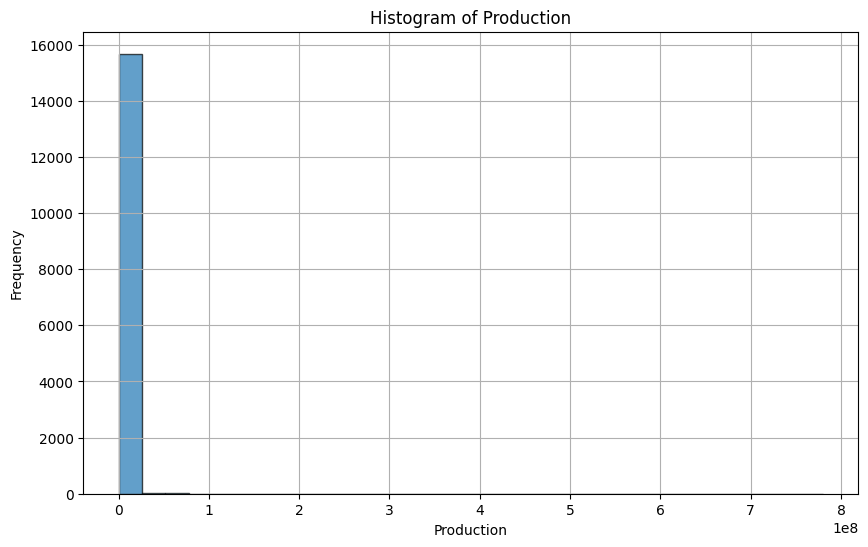

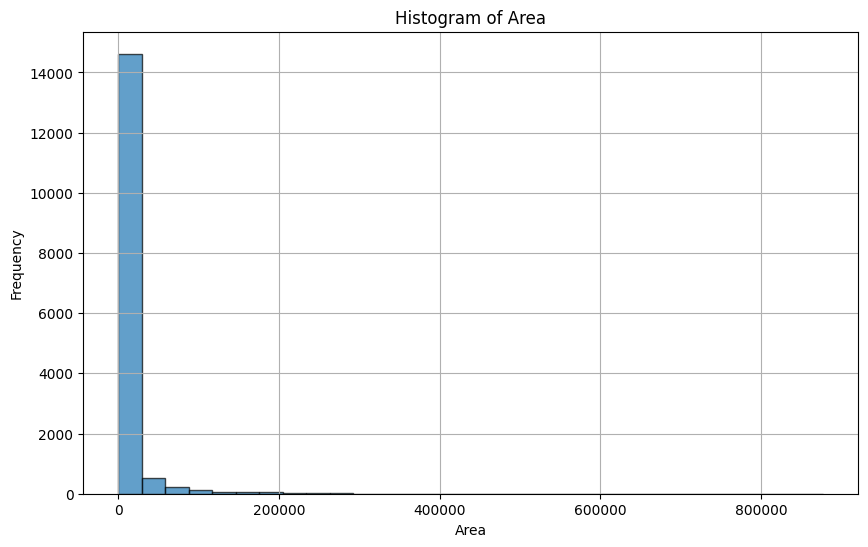

In [7]:
import matplotlib.pyplot as plt

def plot_histogram(df, column):
    """Plot a histogram of a given column."""
    plt.figure(figsize=(10, 6))
    plt.hist(df[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histograms
plot_histogram(df, 'Production')
plot_histogram(df, 'Area')


## Outlier Analysis

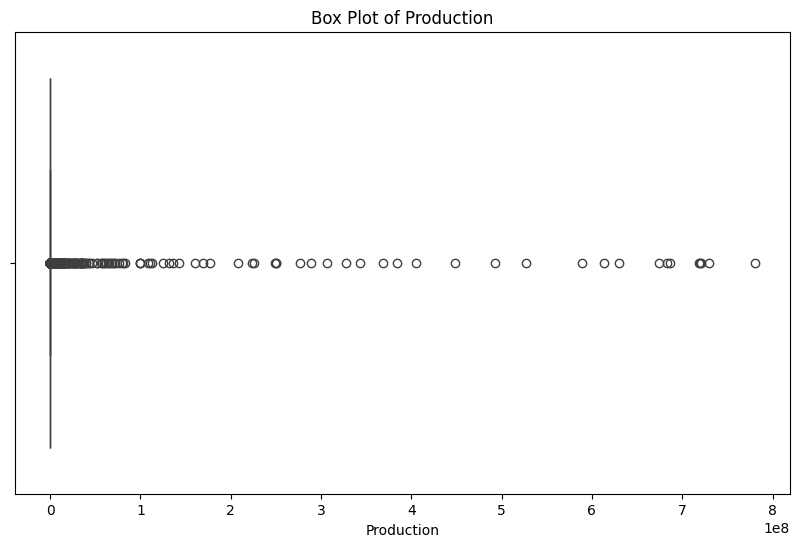

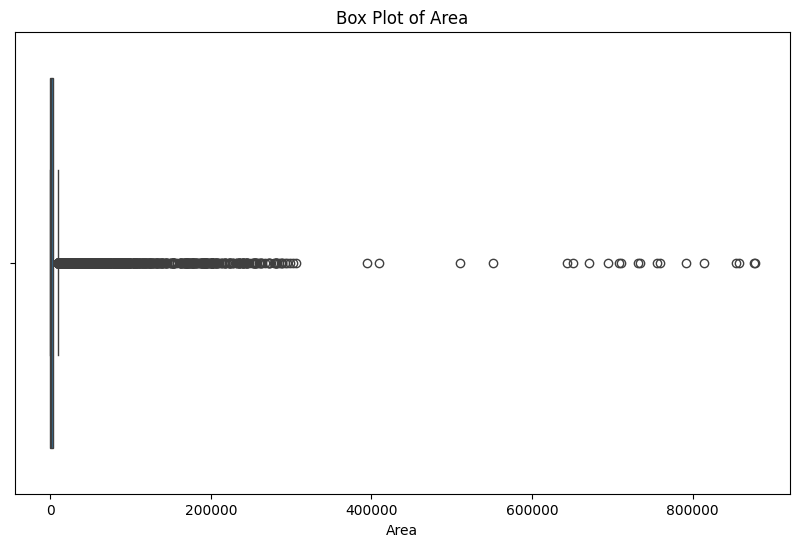

In [8]:
import seaborn as sns

def plot_box_plot(df, column):
    """Plot a box plot for a given column."""
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Plot box plots
plot_box_plot(df, 'Production')
plot_box_plot(df, 'Area')


## Relationship Analysis

In [ ]:
def plot_pair_plot(df):
    """Plot a pair plot of numerical features."""
    numerical_features = df[['Crop_Year', 'Area', 'Production']]
    plt.figure(figsize=(12, 10))
    sns.pairplot(numerical_features)
    plt.title('Pair Plot of Numerical Features')
    plt.show()

plot_pair_plot(df)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_pair_plot(df):
    """Plot a pair plot of numerical features."""
    # Ensure the required columns are present
    required_columns = ['Crop_Year', 'Area', 'Production']
    if all(col in df.columns for col in required_columns):
        numerical_features = df[required_columns].dropna()  # Drop rows with missing values
        plt.figure(figsize=(12, 10))
        sns.pairplot(numerical_features)
        plt.suptitle('Pair Plot of Numerical Features', y=1.02)  # Adjust title position
        plt.show()
    else:
        print(f"DataFrame must contain the following columns: {', '.join(required_columns)}")

# Example usage
df = pd.read_csv('path/to/your/dataset.csv')  # Load your dataset
df = preprocess_data(df)  # Ensure data is preprocessed
plot_pair_plot(df)


## Correlation Heatmap

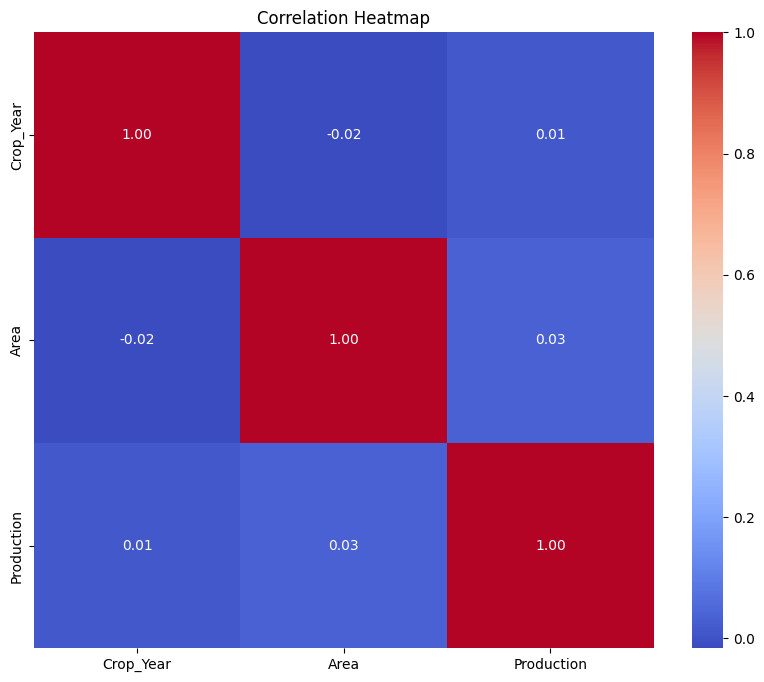

In [9]:
def plot_correlation_heatmap(df):
    """Plot a heatmap of correlations."""
    correlation_matrix = df[['Crop_Year', 'Area', 'Production']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(df)


## Production Over Time

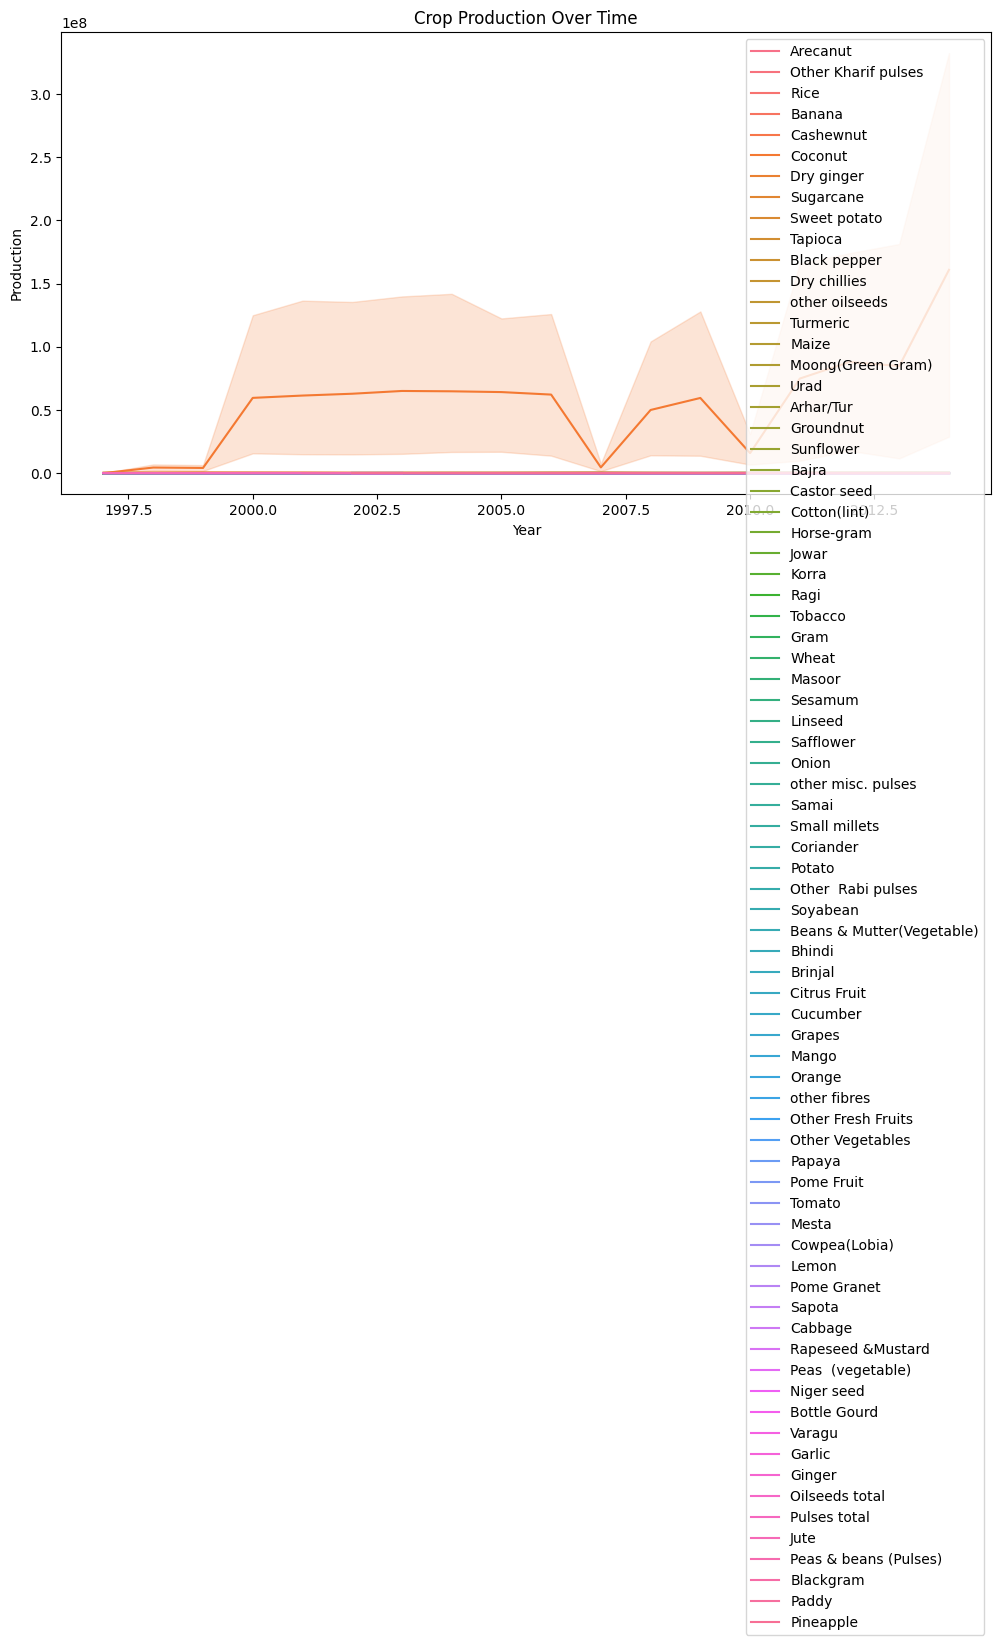

In [10]:
def plot_crop_production_over_time(df):
    """Plot crop production over time."""
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Crop_Year', y='Production', hue='Crop')
    plt.title('Crop Production Over Time')
    plt.xlabel('Year')
    plt.ylabel('Production')
    plt.legend(loc='upper right')
    plt.show()

plot_crop_production_over_time(df)


## Production by State

C:\Users\swapn_xo1cvt1\AppData\Local\Temp\ipykernel_16192\1322292599.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='State_Name', y='Production', ci=None)


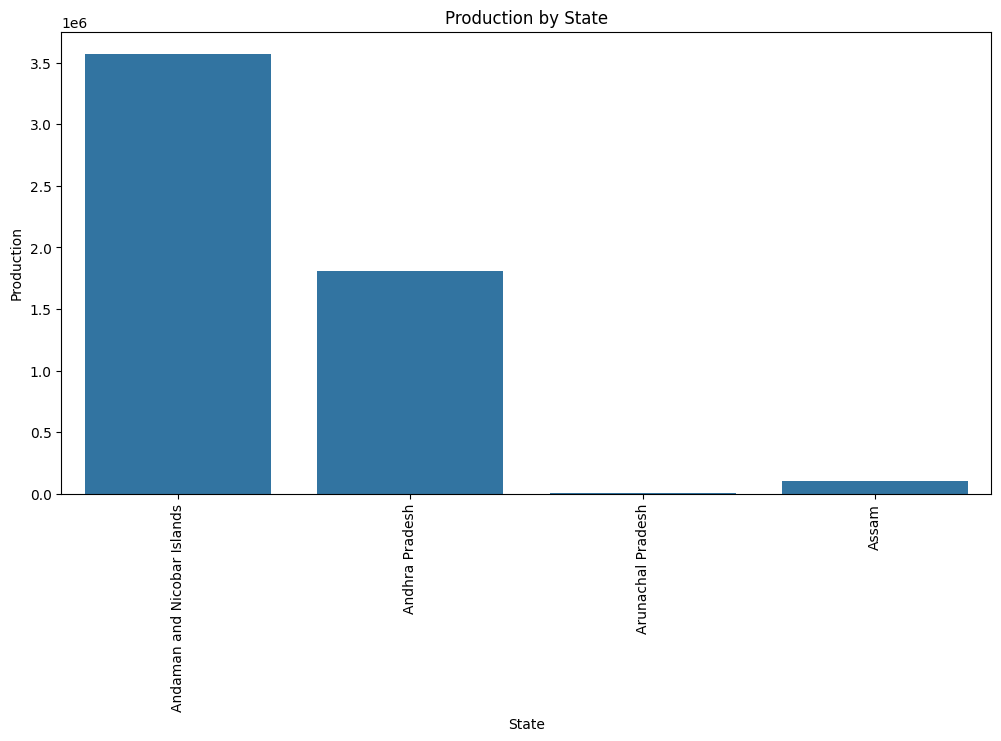

In [11]:
def plot_production_by_state(df):
    """Plot production by state."""
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='State_Name', y='Production', ci=None)
    plt.title('Production by State')
    plt.xlabel('State')
    plt.ylabel('Production')
    plt.xticks(rotation=90)
    plt.show()

plot_production_by_state(df)


## Top 10 States and Districts by Production Counts


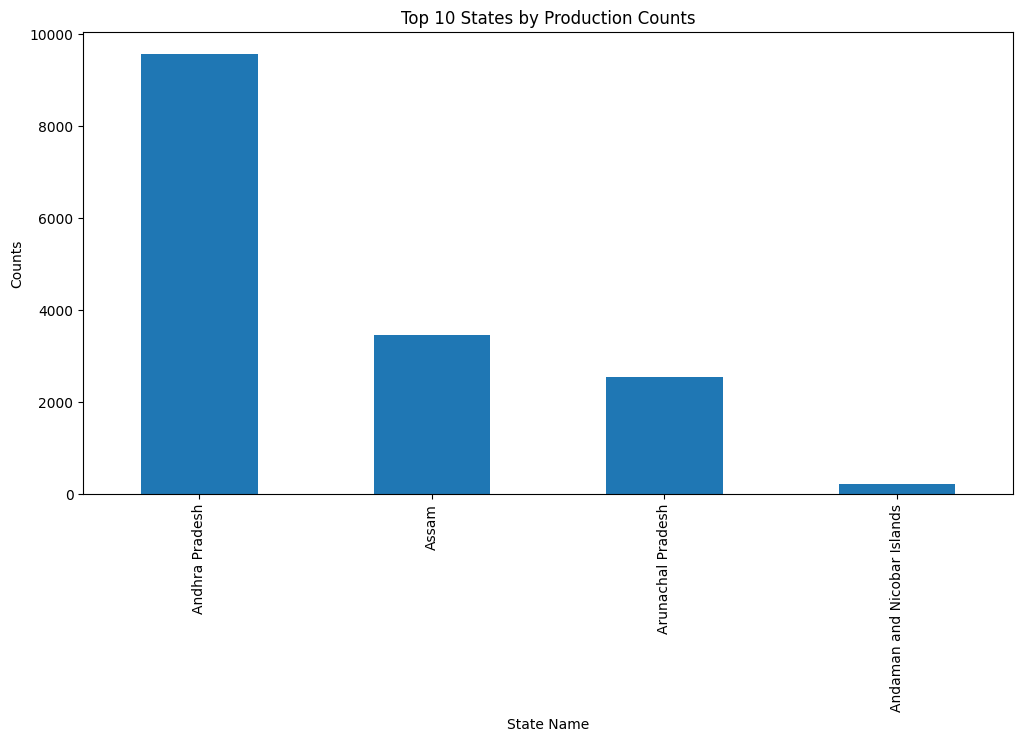

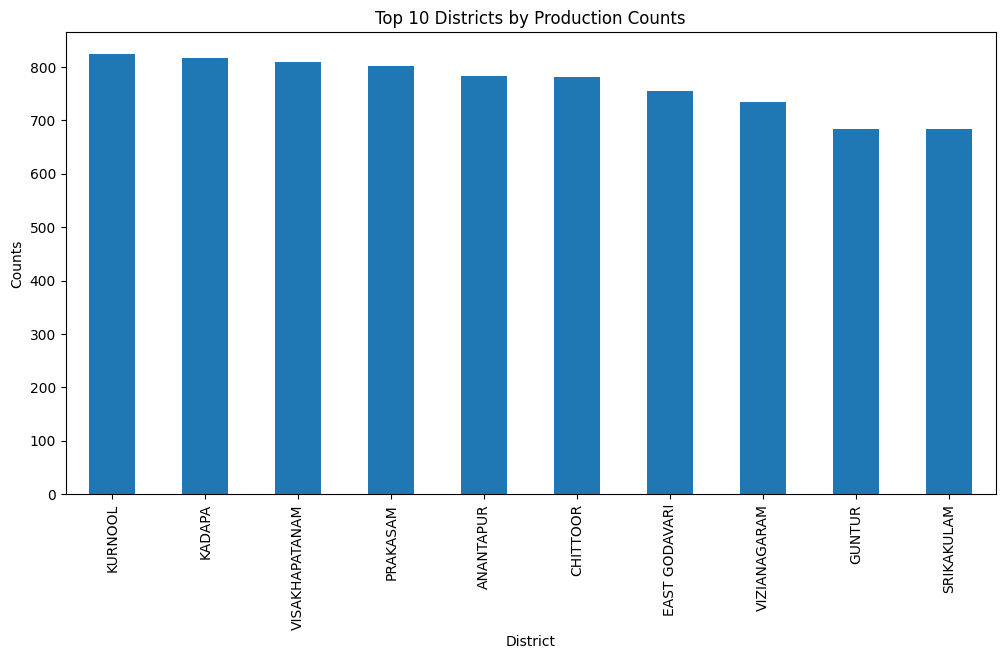

In [12]:
def plot_top_10_states_by_production(df):
    """Plot the top 10 states by production counts."""
    top_10_states = df['State_Name'].value_counts()[:10]
    top_10_states.plot(kind='bar', figsize=(12, 6))
    plt.xlabel('State Name')
    plt.ylabel('Counts')
    plt.title('Top 10 States by Production Counts')
    plt.show()

def plot_top_10_districts_by_production(df):
    """Plot the top 10 districts by production counts."""
    top_10_districts = df['District_Name'].value_counts()[:10]
    top_10_districts.plot(kind='bar', figsize=(12, 6))
    plt.xlabel('District')
    plt.ylabel('Counts')
    plt.title('Top 10 Districts by Production Counts')
    plt.show()

plot_top_10_states_by_production(df)
plot_top_10_districts_by_production(df)


## Crop Production Pie Chart

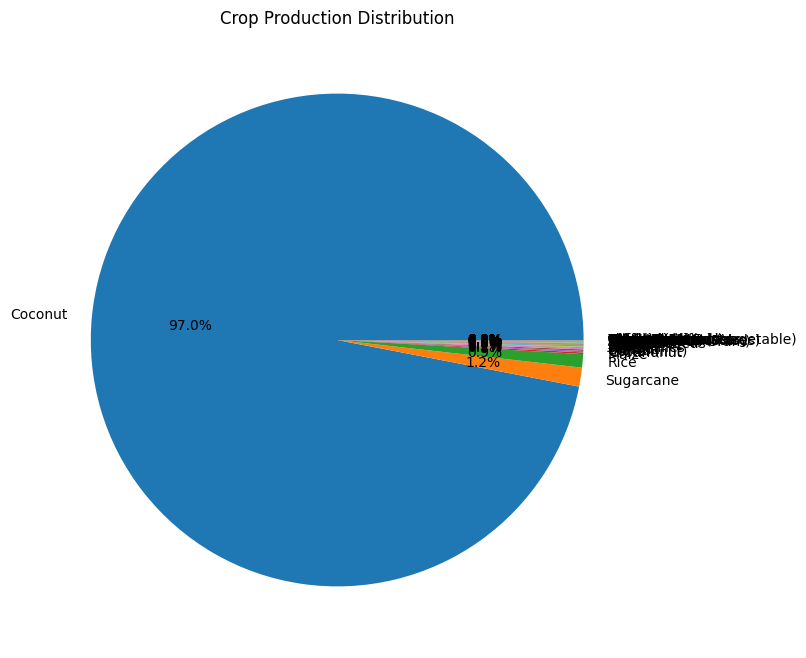

In [13]:
def plot_production_pie_chart(df):
    """Plot a pie chart of production by crop."""
    crop_production = df.groupby('Crop')['Production'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 8))
    crop_production.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Crop Production Distribution')
    plt.ylabel('')
    plt.show()

plot_production_pie_chart(df)


# Conclusion
The EDA has revealed various insights into crop production trends and distributions. We observed the distribution of production and area, identified outliers, explored relationships between features, and visualized key metrics. These insights will help guide further analysis and modeling.
